In [25]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import constants

In [110]:
N = 100000
Tmax = 10.
T = np.linspace(0.,Tmax,N)
dt = Tmax/N

dW = np.random.normal(0., np.sqrt(dt), size=T.shape)
theta = 100000.
sigma = 10.
U = np.exp(-T*theta)*(np.random.normal(0., sigma)+np.cumsum(np.exp(T*theta)*dW))

C:\Users\Evgeniy\AppData\Local\Temp\ipykernel_17688\4176636890.py:9: RuntimeWarning: overflow encountered in exp
  U = np.exp(-T*theta)*(np.random.normal(0., sigma)+np.cumsum(np.exp(T*theta)*dW))


In [111]:
sigma/np.sqrt(2*theta)

0.022360679774997897

In [112]:
dt

0.0001

In [113]:
U = np.zeros(T.shape)
U[0] = np.random.normal(0., sigma/np.sqrt(2*theta));
for i in range(np.size(T)-1):
    U[i+1] = (U[i] + sigma*dW[i])/(1+theta*dt)

In [114]:
np.size(T)

100000

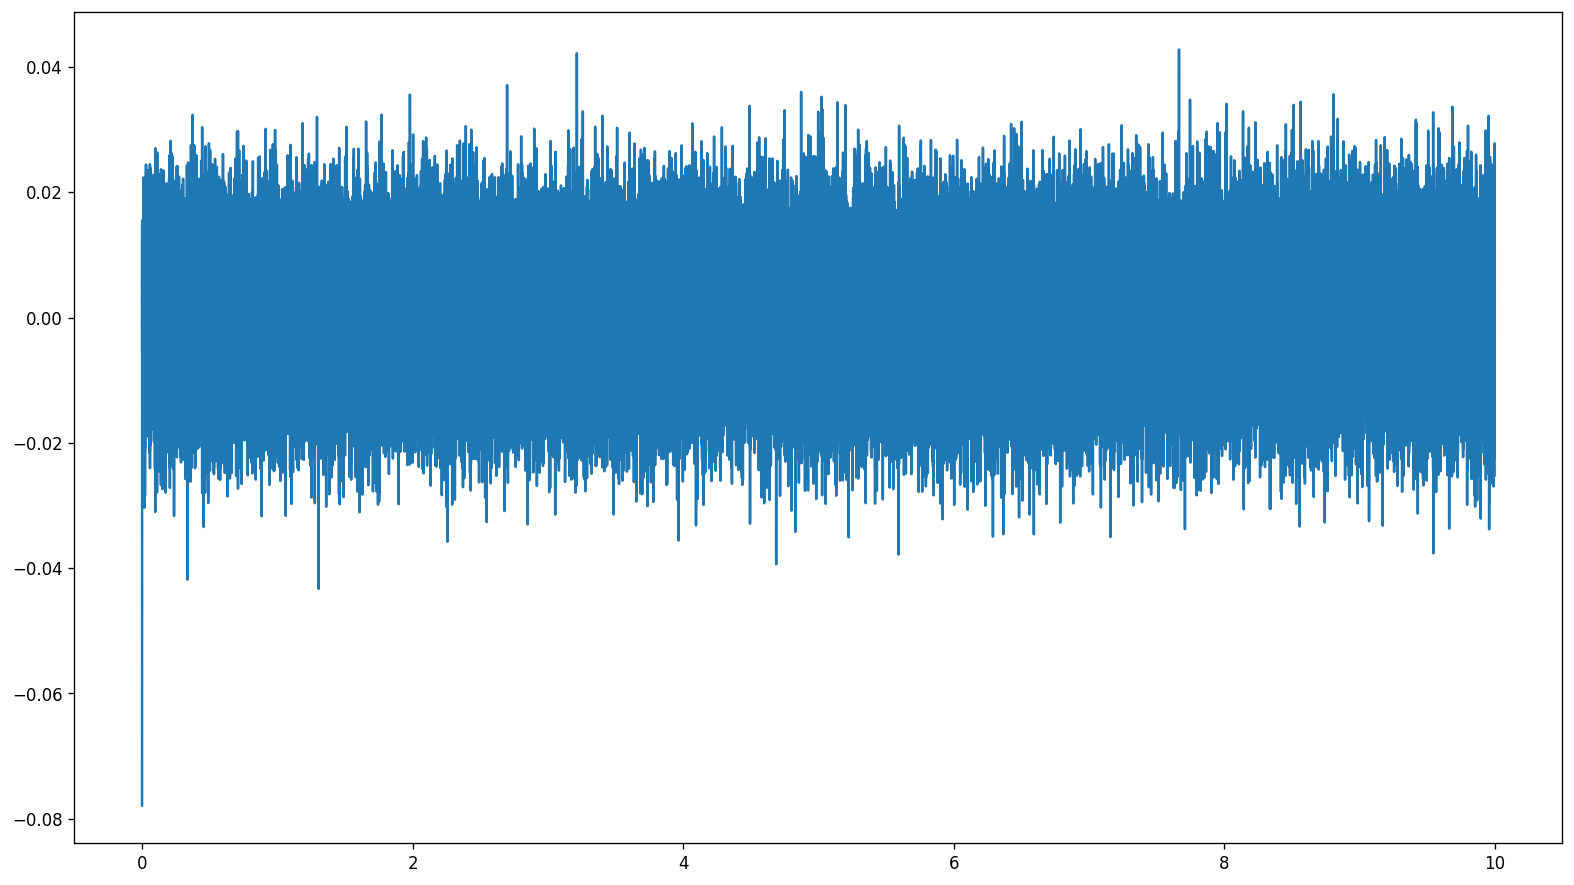

In [115]:
plt.figure(figsize=(16,9), dpi=120)
plt.plot(T, U)

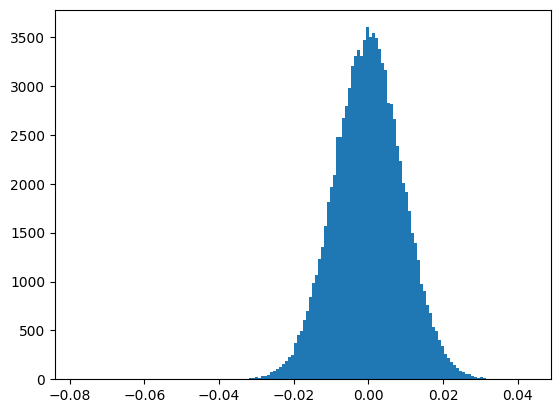

In [116]:
plt.hist(U, bins=150)
plt.show()

In [266]:
# All length values should be the same units, for example, nm 

L = 10e7  # length of fiber
lam = 1550  # laser wavelength
N = 100000  # Integrating steps
M = 1  # Number of simulations


corrLtheta = 5e6  # Correlation length for theta
corrLdn = 1e1 # Correlation length for Delta_n

dn_mean = 0.
dn_sigma = 0.1

theta_sigma = 2*np.pi  # distribution fo trig functions become almost uniform

In [272]:
Matricies = []
dl = L/N;
Ls = np.linspace(0., L, N)

def A(theta, delta_n, lam):
    return 1j*2*np.pi/lam*delta_n*np.array([[np.sin(theta)**2, -np.sin(theta)*np.cos(theta)],
                            [-np.sin(theta)*np.cos(theta), np.cos(theta)**2]])

for m in range(M):
    print("Reached step {}".format(m))
    
    # We must be aware of decorrelation, so solution of Ornstein-Uhlenbeck process in case of
    # large step in comparison to correlation length MUST be replaced with independent distribution
    
    # We need RK4, so instead of interpolating theta and dn functions we will simply generate two times more values
    theta = np.zeros(2*N)
    dn = np.zeros(2*N)
    if corrLtheta < dl:
        theta = np.random.normal(0., theta_sigma, 2*N)
    else:
        dWt = np.random.normal(0., np.sqrt(dl/2), size=2*N)  # Driving Wiener process for theta
        theta[0] = np.random.normal(0., theta_sigma)
        for k in range(2*N-1):
            theta[k+1] = (theta[k] + theta_sigma*np.sqrt(2/corrLtheta)*dWt[k])/(1+dl/2/corrLtheta)
            
    if corrLdn < dl:
        dn = np.random.normal(dn_mean, dn_sigma, 2*N)
    else:
        dWn = np.random.normal(0., np.sqrt(dl/2), size=2*N)  # Driving Wiener process for Delta_n
        dn[0] = np.random.normal(0., dn_sigma)
        for k in range(2*N-1):
            dn[k+1] = (dn[k] + dn_sigma*np.sqrt(2/corrLdn)*dWn[k])/(1+dl/2/corrLdn)
      
    # Start solution for Jones matrix
      
    V = np.array([1., 0.])
    VV = [V]
    for k in range(N-1):
        k1 = A(theta[2*k], dn[2*k], lam) @ V
        k2 = A(theta[2*k+1], dn[2*k+1], lam) @ (V + dl/2*k1)
        k3 = A(theta[2*k+1], dn[2*k+1], lam) @ (V + dl/2*k2)
        k4 = A(theta[2*k+2], dn[2*k+2], lam) @ (V + dl*k3)
        V = V + dl/6*(k1 + 2*k2 + 2*k3 + k4)
        # V = V / np.sqrt(np.conjugate(V) @ V)
        # V = V + dl * A(theta[2*k], dn[2*k], lam) @ V
        print(V)
        VV.append(V)
    
    Matricies.append(V);

Reached step 0
[0.99293894-0.0360636j  0.0263318 +0.12856737j]
[ 1.00055527-0.02627054j -0.04314194+0.04190384j]
[ 1.001163  -0.01853832j -0.04813069-0.02337392j]
[ 1.00130377-0.01998131j -0.04957945-0.00935962j]
[ 1.00113005-0.01917733j -0.04444822-0.03283973j]
[ 1.00215849-0.01898399j -0.02181954-0.02706821j]
[ 0.99895733-0.03023811j -0.03612482-0.07626592j]
[ 0.99739416-0.03237959j -0.05045579-0.08757065j]
[ 0.99642345-0.03415647j -0.05539854-0.09721149j]
[ 0.9833543 -0.05771716j -0.09979609-0.17248332j]
[ 0.97412546-0.06917199j -0.12462357-0.20327383j]
[ 0.94815517-0.09217802j -0.18855606-0.26015559j]
[ 0.97140116-0.06067069j -0.14702411-0.20476025j]
[ 0.9647345 -0.07865784j -0.15787433-0.23360364j]
[ 0.87264604-0.17962134j -0.29822263-0.38684569j]
[ 0.84304268-0.19865714j -0.33727537-0.41201947j]
[ 0.78923161-0.22800495j -0.40010326-0.44634954j]
[ 0.72783377-0.24318759j -0.48161132-0.46605735j]
[ 0.55947669-0.21436067j -0.70374359-0.42865322j]
[ 0.63078003-0.23310888j -0.62675894-

[-9.01790231e+07+8.25056648e+08j -1.46978572e+08-7.25823193e+08j]
[-2.00590671e+08+8.26474857e+08j -1.16447999e+08-7.26619872e+08j]
[-1.97192992e+08+8.36490095e+08j -9.81277148e+07-7.25237516e+08j]
[ 7.41673568e+07+8.69977998e+08j -1.41695053e+08-7.30588081e+08j]
[-1.02293484e+08+8.72766421e+08j -1.11903945e+08-7.31075722e+08j]
[-2.21772788e+08+8.59808692e+08j -8.96253087e+07-7.28216295e+08j]
[-4.82215703e+08+7.89445898e+08j -7.80148155e+07-7.22937267e+08j]
[-4.09390482e+08+8.33333781e+08j -7.42037863e+07-7.20655483e+08j]
[-2.57253277e+08+8.91478729e+08j -9.07519550e+07-7.26537245e+08j]
[ 21754938.88207802+9.40208824e+08j -71422430.76936981-7.23454109e+08j]
[ 1.67958783e+08+9.25458427e+08j -5.26270125e+07-7.25514009e+08j]
[ 2.79880961e+08+9.01999044e+08j -5.43520279e+07-7.24208121e+08j]
[ 4.86888945e+08+7.93733462e+08j -1.00555872e+07-7.48321740e+08j]
[8.51581810e+08+3.90351249e+08j 2.63942769e+07-7.84189571e+08j]
[8.49017950e+08+4.10498913e+08j 2.49462648e+07-7.79627298e+08j]
[7.58322

[ 2.78649029e+16+4.94148855e+16j -5.88761421e+16-4.46598159e+16j]
[ 2.68435966e+16+5.14054135e+16j -6.73005897e+16-2.82747804e+16j]
[ 2.67156690e+16+5.17874060e+16j -7.24946162e+16-1.16039141e+16j]
[ 2.67701973e+16+5.23100378e+16j -7.17700147e+16+1.35594293e+16j]
[ 2.76141901e+16+5.40919431e+16j -6.70075294e+16+3.05204072e+16j]
[ 2.8090204e+16+5.46815311e+16j -7.5718474e+16-3.49625977e+15j]
[ 2.80886183e+16+5.45435190e+16j -7.58944356e+16+5.46992303e+14j]
[ 2.79500952e+16+5.10000305e+16j -7.45009309e+16+3.62113767e+16j]
[ 2.69836260e+16+4.94100983e+16j -5.90577581e+16+6.07554692e+16j]
[ 2.99645980e+16+5.73303458e+16j -8.12663921e+16+7.83332426e+15j]
[ 2.95500233e+16+5.20063532e+16j -7.97480823e+16+3.00045187e+16j]
[ 3.00861588e+16+5.99351754e+16j -8.20323729e+16+3.17659933e+15j]
[ 3.03025872e+16+6.05354237e+16j -8.32891129e+16+1.87025196e+15j]
[ 2.83812539e+16+6.73773974e+16j -7.47626582e+16-3.04937349e+16j]
[ 2.89351587e+16+6.66817169e+16j -8.15772045e+16-2.40961666e+16j]
[ 2.86982752

[1.14909492e+24+7.30053292e+23j 1.48962122e+24+1.51173135e+24j]
[1.00740638e+24+8.55864003e+23j 1.66086532e+24+1.36081760e+24j]
[9.82860406e+23+8.90292303e+23j 1.68886859e+24+1.32259707e+24j]
[9.51529410e+23+9.45722920e+23j 1.71562986e+24+1.27313908e+24j]
[9.51617504e+23+9.54224448e+23j 1.71546860e+24+1.26693733e+24j]
[9.53736912e+23+1.02190184e+24j 1.71408418e+24+1.21348268e+24j]
[9.58092168e+23+9.68417527e+23j 1.71055782e+24+1.25847350e+24j]
[9.78725147e+23+9.92270359e+23j 1.69712429e+24+1.24229901e+24j]
[9.63833971e+23+9.93421856e+23j 1.70591892e+24+1.24158810e+24j]
[9.91555356e+23+1.04388003e+24j 1.68657534e+24+1.20497910e+24j]
[1.09376628e+24+1.08398070e+24j 1.61774123e+24+1.17800758e+24j]
[1.14628379e+24+1.14488277e+24j 1.57534494e+24+1.12801007e+24j]
[1.15801746e+24+1.09061693e+24j 1.56274401e+24+1.18646512e+24j]
[1.10469111e+24+1.23728996e+24j 1.62464580e+24+1.01551409e+24j]
[1.09368312e+24+1.30086964e+24j 1.63114828e+24+9.43780424e+23j]
[1.00014934e+24+1.22219900e+24j 1.712456

[-3.52389481e+30+5.53241531e+29j  2.14094487e+30-1.64207617e+30j]
[-2.79574801e+30+1.95769903e+30j  1.74723494e+30-2.41664642e+30j]
[-2.54230047e+30+2.37724117e+30j  1.64868564e+30-2.58532051e+30j]
[-7.05419335e+29+3.34232908e+30j  8.46025764e+29-3.00721212e+30j]
[-2.34614188e+30+2.60477556e+30j  1.87585919e+30-2.54066316e+30j]
[-2.12831564e+30+2.81863570e+30j  1.77521634e+30-2.63915962e+30j]
[-2.57051490e+30+2.4949987e+30j  2.05444273e+30-2.4237533e+30j]
[-1.05946190e+30+3.67754028e+30j  7.58478147e+29-3.43372835e+30j]
[ 1.29893880e+30+3.87775067e+30j -7.31784439e+29-3.55849546e+30j]
[ 8.57222507e+29+3.97881916e+30j -4.14812955e+29-3.63129530e+30j]
[ 1.81269244e+30+3.76584477e+30j -9.10625448e+29-3.52072347e+30j]
[ 3.40641853e+30+2.66851349e+30j -1.48453479e+30-3.14748047e+30j]
[ 3.32495945e+30+2.83730018e+30j -1.44286029e+30-3.21647339e+30j]
[ 3.31673186e+30+2.85081792e+30j -1.44233354e+30-3.21840930e+30j]
[ 2.19771678e+30+3.65801840e+30j -1.05895234e+30-3.50368744e+30j]
[ 1.06917783

[-2.21310343e+37+1.53293980e+37j -7.03067935e+36-4.20030901e+36j]
[-2.20406079e+37+1.55038874e+37j -7.11316799e+36-4.30884989e+36j]
[-2.15909783e+37+1.62355261e+37j -6.97826771e+36-4.11430025e+36j]
[-1.62017698e+37+2.22563399e+37j -5.55591612e+36-2.58385655e+36j]
[-1.28047854e+37+2.50980461e+37j -4.39618136e+36-1.61408122e+36j]
[-1.03334189e+37+2.65556513e+37j -3.54145790e+36-1.11307255e+36j]
[-1.76800371e+37+2.20625355e+37j -4.83551148e+36-1.93438130e+36j]
[-1.57458955e+37+2.40729276e+37j -4.24367592e+36-1.33200423e+36j]
[-1.05662731e+37+2.69079553e+37j -3.31716048e+36-8.35981240e+35j]
[-2.47935100e+37+1.83434308e+37j -5.87846432e+36-2.34895144e+36j]
[-3.06214500e+37-3.34503145e+36j -6.36562026e+36-3.30400011e+36j]
[-3.14438166e+37+1.12964749e+37j -6.07316183e+36-7.55973714e+36j]
[-3.14621713e+37+1.18753396e+37j -6.09849568e+36-7.68403275e+36j]
[-3.40544241e+37+4.12945495e+36j -5.92014833e+36-7.00096082e+36j]
[-3.47515748e+37+4.49752281e+36j -5.74836772e+36-6.50754454e+36j]
[-3.465362

[ 1.57886003e+43+1.08947601e+42j -1.99158659e+43+7.58353485e+42j]
[ 1.59556508e+43+1.41576898e+42j -1.88373793e+43+9.69573831e+42j]
[ 1.65864372e+43+2.28091128e+42j -1.75792381e+43+1.20469575e+43j]
[ 1.65524345e+43+2.46514107e+42j -1.78051381e+43+1.40023392e+43j]
[ 1.64331319e+43+2.32167154e+42j -1.97717234e+43+1.15631524e+43j]
[ 1.66011277e+43+2.46724635e+42j -1.70106386e+43+1.52027426e+43j]
[ 1.56357026e+43+1.73277250e+42j -2.56400783e+43+5.71760897e+42j]
[ 1.58359915e+43+2.34921501e+42j -2.48199801e+43+8.28059351e+42j]
[ 1.58316550e+43+2.33333140e+42j -2.50059303e+43+7.75361506e+42j]
[ 1.60594433e+43+2.89327455e+42j -2.37755629e+43+1.07328933e+43j]
[ 1.58448387e+43+2.47814250e+42j -2.46798989e+43+8.98218016e+42j]
[ 1.51467963e+43+6.32473021e+41j -2.68007122e+43+3.46650644e+42j]
[ 1.52912073e+43+1.28049509e+42j -2.59169756e+43+7.44554057e+42j]
[ 1.54925923e+43+1.79248949e+42j -2.48999640e+43+9.97223586e+42j]
[ 1.56475075e+43+2.46343562e+42j -2.43574845e+43+1.27605140e+43j]
[ 1.565754

[-5.52242131e+52-2.41955663e+52j  1.25953503e+52+5.52095887e+52j]
[-6.86252080e+52-9.19389802e+51j  3.12721899e+52+3.49258953e+52j]
[-6.97572338e+52-6.99320702e+51j  3.31833643e+52+3.12401332e+52j]
[-7.29898481e+52+1.71624492e+51j  4.03250340e+52+1.09601072e+52j]
[-7.05195981e+52-7.44325584e+51j  3.55813827e+52+2.81799143e+52j]
[-7.00228358e+52-8.55503139e+51j  3.49465410e+52+2.99944379e+52j]
[-7.13896366e+52-5.64237072e+51j  4.14547839e+52+1.58398916e+52j]
[-7.11885231e+52-6.11844079e+51j  4.07639589e+52+2.06152194e+52j]
[-7.11886867e+52-6.09794419e+51j  4.22086289e+52+1.76655613e+52j]
[-7.19270399e+52-2.11234331e+51j  4.54149164e+52-1.73742749e+51j]
[-7.18451649e+52-1.11617331e+51j  4.49409481e+52-7.95554895e+51j]
[-7.17841662e+52-8.48925722e+50j  4.34421591e+52-1.43291644e+52j]
[-7.17973056e+52-8.39098819e+50j  4.42799711e+52-1.16162191e+52j]
[-7.18620892e+52-1.05156229e+51j  4.33539182e+52-1.43864862e+52j]
[-7.16285822e+52-1.00120702e+51j  4.36531812e+52-1.69338020e+52j]
[-6.999108

[ 1.64007341e+60-2.61645028e+60j -2.28704137e+60+1.32845454e+60j]
[ 1.24617861e+60-2.95919869e+60j -1.61470399e+60+1.91373087e+60j]
[ 2.08724087e+60-2.03478138e+60j -2.91124832e+60+5.07719460e+59j]
[ 2.08746877e+60-2.04913230e+60j -2.90069537e+60+5.54692632e+59j]
[ 2.00199960e+60-2.21981821e+60j -2.77920618e+60+7.98180481e+59j]
[ 2.00026476e+60-2.23462826e+60j -2.77828910e+60+8.14354637e+59j]
[ 1.23127163e+60-3.08702074e+60j -1.94525001e+60+1.74099491e+60j]
[ 1.49841064e+60-2.88861248e+60j -2.30183018e+60+1.47683715e+60j]
[ 1.40360860e+60-2.97964026e+60j -2.19737989e+60+1.57895983e+60j]
[ 1.98849711e+60-2.34389400e+60j -2.84460991e+60+8.78035433e+59j]
[ 2.20853643e+60-1.97024852e+60j -3.11095828e+60+4.43091600e+59j]
[ 2.34841232e+60-7.63352959e+59j -3.28284320e+60-1.47267669e+60j]
[ 2.39116610e+60-9.56489648e+59j -3.41161413e+60-8.74498630e+59j]
[ 2.40611870e+60-1.09152114e+60j -3.41824806e+60-7.05393907e+59j]
[ 2.40742368e+60-1.02560598e+60j -3.34286017e+60-1.23628923e+60j]
[ 2.326538

[-9.45432926e+69+1.47834051e+70j  1.01034543e+70+2.83163644e+70j]
[-9.42849882e+69+1.48945812e+70j  9.94306957e+69+2.85770322e+70j]
[-1.27806405e+70+1.51882269e+70j  1.46804052e+69+2.91957843e+70j]
[-1.43173559e+70+1.48530089e+70j -1.13974541e+70+2.65221165e+70j]
[-1.38377288e+70+1.50618403e+70j -8.60326284e+69+2.77353584e+70j]
[-1.33679041e+70+1.53551732e+70j -6.55570475e+69+2.90184380e+70j]
[-1.52136560e+70+1.45457244e+70j -1.46684179e+70+2.54216600e+70j]
[-1.53333045e+70+1.45144970e+70j -1.57097384e+70+2.49214882e+70j]
[-1.54146386e+70+1.44641598e+70j -1.70106169e+70+2.40511558e+70j]
[-1.57431029e+70+1.41774001e+70j -2.39675288e+70+1.84832290e+70j]
[-1.55572197e+70+1.44800319e+70j -2.79092125e+70+1.27498700e+70j]
[-1.53298515e+70+1.52054971e+70j -2.99416823e+70+6.68102343e+69j]
[-1.54903493e+70+1.43715080e+70j -3.09163049e+70+2.33153216e+69j]
[-1.55969598e+70+1.19155583e+70j -3.13630567e+70-6.26388632e+69j]
[-1.55531669e+70+1.14740841e+70j -3.12429244e+70-7.65198978e+69j]
[-1.569276

[1.01474893e+79+1.47462622e+79j 8.10505026e+78+8.45966164e+78j]
[4.50408977e+78+1.76958168e+79j 7.81118625e+78+8.61377156e+78j]
[6.95424132e+78+1.71901105e+79j 7.72421238e+78+8.63168003e+78j]
[6.38091692e+78+1.76686056e+79j 7.67449340e+78+8.57856836e+78j]
[1.31590453e+79+1.33800961e+79j 8.43389326e+78+8.00556211e+78j]
[1.89228572e+79+1.81507285e+78j 9.36673837e+78+6.18444197e+78j]
[1.74041658e+79+7.28588053e+78j 8.86812165e+78+7.94581024e+78j]
[2.03789834e+79-9.89408679e+77j 1.01176796e+79+4.46600213e+78j]
[2.08596605e+79-3.96656189e+78j 1.03243618e+79+2.76211077e+78j]
[2.00230761e+79+4.57981940e+78j 9.89894512e+78+7.10806116e+78j]
[2.10258129e+79-3.32461201e+78j 1.04218647e+79+2.93284977e+78j]
[1.95978794e+79-1.01556873e+79j 9.71670589e+78-6.56095033e+77j]
[1.99500898e+79-9.36238005e+78j 9.89849964e+78-2.51020738e+77j]
[1.9678664e+79-1.01336567e+79j 9.6621187e+78-8.85033110e+77j]
[2.07443525e+79-7.98410861e+78j 1.00372172e+79-1.13267776e+77j]
[2.08234688e+79-1.04418273e+79j 1.01103758

[ 2.03992038e+87-2.64460705e+87j -1.29984125e+87-5.39874606e+87j]
[ 2.11612406e+87-2.63343936e+87j -1.43772972e+87-5.40096226e+87j]
[ 2.43234475e+87-2.92791308e+87j -1.91914583e+87-4.95122436e+87j]
[ 2.70596668e+87-3.37031793e+87j -2.27473836e+87-4.37875576e+87j]
[ 2.15654488e+87-2.72793485e+87j -1.41811395e+87-5.38919707e+87j]
[ 1.99135837e+87-2.57217053e+87j -1.20624482e+87-5.58414879e+87j]
[ 2.04339335e+87-2.62160668e+87j -1.26368359e+87-5.52942042e+87j]
[ 2.10852561e+87-2.6980809e+87j -1.32897735e+87-5.4526829e+87j]
[ 1.78047632e+87-2.39523413e+87j -9.77764335e+86-5.77745164e+87j]
[ 1.91901364e+87-2.52371631e+87j -1.11913188e+87-5.65194227e+87j]
[ 2.09960060e+87-2.86409824e+87j -1.26114139e+87-5.38965302e+87j]
[ 1.85664014e+87-2.61951279e+87j -1.01493567e+87-5.65501908e+87j]
[ 1.66948833e+87-2.30359866e+87j -8.77130816e+86-5.87031256e+87j]
[ 1.65789239e+87-2.10454038e+87j -8.67136866e+86-5.95323037e+87j]
[ 1.04808417e+87-2.63881667e+87j -8.03379893e+86-5.89773794e+87j]
[ 2.09403519

[ 1.79881449e+95-1.29411411e+94j -5.59237470e+94-2.87723397e+94j]
[ 1.79651279e+95+1.49606641e+94j -5.57985668e+94-3.71152084e+94j]
[ 1.55774345e+95+8.54189319e+94j -4.35106795e+94-7.21695994e+94j]
[ 1.56948120e+95+8.45476890e+94j -4.44193856e+94-7.12324492e+94j]
[ 1.73377895e+95+5.68703144e+94j -5.23888334e+94-5.77030804e+94j]
[ 1.81671184e+95+3.05629260e+94j -5.48545747e+94-4.99661083e+94j]
[ 1.77858365e+95-6.51431674e+94j -5.43443717e+94-2.85011210e+94j]
[ 1.58981422e+95-1.12774621e+95j -5.28956708e+94-2.46057380e+94j]
[ 1.23425550e+95-1.62904915e+95j -5.23354506e+94-2.36783944e+94j]
[ 1.11354306e+95-1.72471594e+95j -5.13268757e+94-2.28806435e+94j]
[ 7.32831407e+94-1.92947480e+95j -4.78795102e+94-2.10262813e+94j]
[ 1.15628680e+95-1.68908051e+95j -5.45928331e+94-2.49050191e+94j]
[ 2.09278698e+95-2.58170141e+94j -6.68054124e+94-4.29975600e+94j]
[ 2.07146365e+95-4.13045226e+94j -6.68342534e+94-4.32950669e+94j]
[ 2.08959467e+95-3.26795405e+94j -6.70773107e+94-4.50671929e+94j]
[ 2.335305

[-1.48157756e+103-3.63034449e+102j -1.95347715e+103+3.94407418e+103j]
[-1.01708542e+103-3.22036997e+102j -2.29675396e+103+3.90993457e+103j]
[-2.07371177e+103-4.46574705e+102j -1.19975177e+103+4.02989526e+103j]
[-2.28948240e+103-4.24014393e+102j -8.90192417e+102+3.99829195e+103j]
[-3.08481166e+103-2.90298855e+102j  4.31477769e+102+3.75590080e+103j]
[-3.51294316e+103+6.76401003e+101j  1.03900241e+103+3.23715111e+103j]
[-3.65859150e+103+2.17569039e+102j  1.29893447e+103+2.96327082e+103j]
[-3.84433106e+103+5.12446183e+102j  1.56461182e+103+2.53161915e+103j]
[-3.71429790e+103+2.73585233e+102j  1.20541037e+103+3.17382017e+103j]
[-3.90586600e+103+5.18792748e+102j  1.52170179e+103+2.77411789e+103j]
[-4.21159778e+103+7.20238894e+102j  2.04038989e+103+2.38684978e+103j]
[-4.45977294e+103+1.71208931e+103j  2.25785355e+103+1.52602951e+103j]
[-4.29331985e+103+7.25006062e+102j  2.11246414e+103+2.60580538e+103j]
[-4.18943311e+103+3.21632512e+102j  2.02701393e+103+2.93473150e+103j]
[-2.89690930e+103-1.

[-3.26650143e+110+9.66851478e+109j -2.92095229e+110-9.59924077e+109j]
[-3.42290219e+110+6.37354222e+109j -2.87767215e+110-8.60285204e+109j]
[-3.50227174e+110-9.00188376e+109j -2.86324931e+110-7.93897076e+109j]
[-3.60148679e+110+5.49443335e+109j -2.85719388e+110-9.26083314e+109j]
[-3.61894222e+110-5.30023666e+109j -2.85174774e+110-9.21487250e+109j]
[-3.62105250e+110-5.58077726e+109j -2.85138543e+110-9.20578106e+109j]
[-3.39725328e+110-1.96344323e+110j -2.86452833e+110-8.94262356e+109j]
[-3.86056624e+110-1.11372735e+110j -2.85380927e+110-8.74872511e+109j]
[-3.98192444e+110-1.11979772e+110j -2.81618474e+110-9.10461073e+109j]
[-4.05199343e+110-8.6252615e+109j -2.79523762e+110-9.8860772e+109j]
[-3.90840025e+110-1.39540063e+110j -2.84174180e+110-8.16847973e+109j]
[-4.10378963e+110-3.70251165e+109j -2.75412894e+110-1.25803343e+110j]
[-3.62752981e+110-2.41522637e+110j -2.91607915e+110-5.40416586e+109j]
[-3.68978418e+110-2.46111640e+110j -2.84486606e+110-5.59850867e+109j]
[-3.22614291e+110-2.89

[-2.53829695e+119+7.08107005e+118j  4.90589187e+119-8.75776321e+119j]
[-2.57701513e+119+6.61753727e+118j  4.58294905e+119-9.08560194e+119j]
[-2.88788003e+119+5.25368254e+118j  2.82655205e+119-9.85462384e+119j]
[-2.91236964e+119+4.19382929e+118j -3.67194628e+119-1.05224244e+120j]
[-2.98421958e+119+4.56044543e+118j -3.70943593e+119-1.04878733e+120j]
[-3.56418981e+119+7.87175781e+118j -5.30953199e+119-9.57663491e+119j]
[-4.19732314e+119+1.25473482e+119j -6.59207541e+119-8.61166613e+119j]
[-5.12104225e+119+2.22113824e+119j -8.55047672e+119-6.51750331e+119j]
[-4.13750055e+119+8.39535022e+118j -6.56853061e+119-9.29454536e+119j]
[-2.35051342e+119-2.77224721e+118j -2.98560423e+119-1.15235807e+120j]
[-3.74607069e+119+4.96206403e+118j -5.81944507e+119-9.94713737e+119j]
[-4.99041981e+119+2.00590150e+119j -8.09254101e+119-7.27785343e+119j]
[-4.16452821e+119+5.90098298e+118j -7.08175510e+119-8.97092077e+119j]
[-5.87179952e+119+2.91667155e+119j -9.09190316e+119-6.45161864e+119j]
[-6.52579961e+119+4.

[-8.69539396e+127-2.88486027e+127j -5.90577565e+126+5.41454459e+127j]
[-8.71382932e+127-2.88866340e+127j -3.55805179e+125+5.42708384e+127j]
[-8.57830777e+127-2.91432145e+127j -8.07586358e+126+5.58352167e+127j]
[-8.24348472e+127-2.86795026e+127j -3.51804373e+127+5.15467419e+127j]
[-8.29832394e+127-2.89471489e+127j -2.70056737e+127+5.56902249e+127j]
[-8.32987420e+127-2.90234227e+127j -3.73641596e+127+5.08906066e+127j]
[-8.10874098e+127-2.77140932e+127j -5.53311326e+127+4.07510676e+127j]
[-8.13729721e+127-2.78935507e+127j -5.44977857e+127+4.12918240e+127j]
[-8.15105940e+127-2.82249072e+127j -5.37689958e+127+4.26079944e+127j]
[-8.34079621e+127-2.96163721e+127j -4.09575717e+127+5.14154372e+127j]
[-8.48157282e+127-3.03791170e+127j -3.00390134e+127+5.73305975e+127j]
[-8.93994089e+127-3.05106911e+127j  5.17035454e+126+5.80995960e+127j]
[-9.12551045e+127-2.95826258e+127j  1.83487537e+127+5.27769355e+127j]
[-8.75060995e+127-3.15910299e+127j  3.33697573e+126+6.08080133e+127j]
[-9.02587267e+127-3.

[-5.56389542e+135+1.50721700e+136j  9.93569992e+135+2.16455657e+135j]
[-7.29837215e+135+1.50903799e+136j  8.81505255e+135+2.17564760e+135j]
[-4.47605129e+135+1.49230028e+136j  1.07958545e+136+2.05347449e+135j]
[-2.45282694e+135+1.45022513e+136j  1.20386464e+136+1.78792463e+135j]
[-3.67982271e+135+1.47142906e+136j  1.15796258e+136+1.86458062e+135j]
[-1.77805049e+135+1.46390600e+136j  1.21348795e+136+1.84282663e+135j]
[-8.84190503e+135+1.45235240e+136j  1.05392953e+136+1.85561504e+135j]
[-1.47222288e+136+1.07374050e+136j  1.07868516e+136+1.95705488e+135j]
[-1.53647762e+136+1.01934471e+136j  1.06204206e+136+1.80271591e+135j]
[-1.74470006e+136+8.03568696e+135j  9.43922568e+135+5.59885425e+134j]
[-1.94923916e+136+3.54586157e+135j  7.91276655e+135-2.83009270e+135j]
[-1.95051640e+136+2.91712603e+135j  7.90120125e+135-3.45028560e+135j]
[-1.95167022e+136+2.55693831e+135j  7.89483747e+135-3.75673011e+135j]
[-1.92481866e+136+1.23847311e+135j  8.16981080e+135-5.01519819e+135j]
[-1.94625462e+136+1.

[-7.76819236e+142-2.31740125e+143j  4.83881701e+143+1.02645986e+143j]
[-1.10484765e+143-1.81241323e+143j  5.06692957e+143+6.80035044e+142j]
[-8.64338841e+142-2.39158685e+143j  4.86752403e+143+1.23520748e+143j]
[-1.06386134e+143-2.06626107e+143j  5.15471146e+143+7.83939218e+142j]
[-1.15491442e+143-1.87435456e+143j  5.37674426e+143+2.88264666e+142j]
[-1.20436507e+143-1.62458032e+143j  5.52038705e+143-4.69270011e+142j]
[-1.18870618e+143-1.46167539e+143j  5.43204674e+143-1.42169446e+143j]
[-1.19083585e+143-1.41538435e+143j  5.44824423e+143-1.83294817e+143j]
[-1.18408485e+143-1.38843878e+143j  4.73498956e+143-3.27737614e+143j]
[-1.62689534e+143-1.76601424e+143j  3.72902650e+143-4.12032402e+143j]
[-1.68309476e+143-1.81261066e+143j  3.62129980e+143-4.21286133e+143j]
[-1.87345125e+143-1.94144661e+143j  3.11524035e+143-4.50660261e+143j]
[-2.36125708e+143-2.15714890e+143j  2.29844053e+143-4.86519576e+143j]
[-2.29862127e+143-2.18414199e+143j  2.57081545e+143-4.89891138e+143j]
[-3.18524854e+143-2.

[2.34819290e+151-1.22454054e+151j 1.72823768e+151+1.15288037e+151j]
[2.36691643e+151-1.34246908e+151j 1.74906970e+151+1.04000497e+151j]
[2.34927932e+151-1.52352696e+151j 1.73119541e+151+8.56711121e+150j]
[2.35056891e+151-1.37897601e+151j 1.73617393e+151+1.06334431e+151j]
[2.37195151e+151-1.21219937e+151j 1.76851113e+151+1.26585610e+151j]
[2.42188536e+151-1.24652488e+151j 1.86820500e+151+1.14681116e+151j]
[2.41885124e+151-1.57163954e+151j 1.86427767e+151+7.37183597e+150j]
[2.25702413e+151-2.17834347e+151j 1.67129784e+151-2.09637005e+149j]
[2.17657080e+151-2.35372376e+151j 1.54553412e+151-2.96363800e+150j]
[2.18029272e+151-2.34667150e+151j 1.55616717e+151-2.77383951e+150j]
[1.98606584e+151-2.70804126e+151j 1.14402553e+151-1.01769807e+151j]
[2.17446167e+151-2.53429272e+151j 1.49124256e+151-6.73228330e+150j]
[2.15474339e+151-2.61691530e+151j 1.42867760e+151-8.40001106e+150j]
[2.47793139e+151-2.33706721e+151j 2.02037740e+151-3.88458186e+150j]
[2.33636697e+151-2.56623088e+151j 1.76249049e+15

[-3.96758745e+158+4.24577289e+158j -1.79536724e+158+3.51380873e+157j]
[-4.13004734e+158+4.23235276e+158j -1.43043067e+158+3.81578624e+157j]
[-4.10532523e+158+4.23138762e+158j -1.50509715e+158+3.74316082e+157j]
[-4.15025131e+158+4.2656837e+158j -1.30474872e+158+2.1538615e+157j]
[-4.03052516e+158+4.27544131e+158j -1.61663103e+158+1.78926319e+157j]
[-3.85326513e+158+4.24765867e+158j -2.05462599e+158+2.46509379e+157j]
[-3.56577873e+158+4.22588770e+158j -2.56661369e+158+2.85461823e+157j]
[-3.39052405e+158+4.15696557e+158j -2.88187096e+158+4.11555765e+157j]
[-3.41099283e+158+4.19545292e+158j -2.81792321e+158+3.00834224e+157j]
[-3.66172678e+158+4.20245083e+158j -2.47265738e+158+2.93921429e+157j]
[-3.95772034e+158+4.13550411e+158j -2.10358450e+158+3.71200402e+157j]
[-4.34489554e+158+3.90279754e+158j -1.68265522e+158+6.24582036e+157j]
[-3.96964333e+158+4.20990795e+158j -1.91548090e+158+4.33389453e+157j]
[-4.87431985e+158+3.34267235e+158j -1.42910500e+158+8.87549088e+157j]
[-4.19787995e+158+4.12

[-3.56177155e+165-4.26020496e+165j -2.85074314e+165-8.77830438e+164j]
[-3.48054007e+165-4.40486808e+165j -2.66781535e+165-1.18840992e+165j]
[-2.85977258e+165-5.02535441e+165j -1.62800368e+165-2.20721521e+165j]
[-2.02500025e+165-5.42601013e+165j -7.20543082e+164-2.62936022e+165j]
[-1.32966110e+165-5.61687177e+165j  7.82195812e+163-2.85342820e+165j]
[-1.11855044e+165-5.63638276e+165j  4.01090520e+164-2.88477383e+165j]
[-3.30996107e+164-5.81871845e+165j  9.32103504e+164-3.00839247e+165j]
[-1.68425874e+165-5.87497887e+165j -2.48995064e+164-3.06397319e+165j]
[-2.84725667e+165-5.75157917e+165j -1.02703443e+165-2.99491981e+165j]
[-7.50075793e+165-2.94094910e+165j -3.62804245e+165-1.20645599e+165j]
[-8.08404852e+165-1.67083282e+165j -3.91247469e+165-6.38153733e+164j]
[-8.15833202e+165+1.80022754e+165j -3.93655891e+165+5.16851707e+164j]
[-7.42014624e+165+4.19895643e+165j -3.66011986e+165+1.45704564e+165j]
[-8.30551319e+165+1.23001225e+165j -4.19407452e+165-2.35717711e+164j]
[-9.09983741e+165+2.

[1.74967688e+175-8.78760982e+174j 2.41524080e+175-8.54008947e+174j]
[1.73948739e+175-9.27433351e+174j 2.52798095e+175-3.50839184e+174j]
[1.74691834e+175-9.12256337e+174j 2.52181637e+175-6.24967593e+174j]
[1.73304953e+175-9.87190852e+174j 2.49808349e+175-1.01814717e+175j]
[1.73358328e+175-9.85667518e+174j 2.57760256e+175-8.41380104e+174j]
[1.71871096e+175-1.06940912e+175j 2.65947731e+175-3.98046537e+174j]
[1.74331137e+175-8.37585647e+174j 2.58544598e+175-1.23639494e+175j]
[1.83243880e+175-6.84942563e+174j 2.17324027e+175-1.98066400e+175j]
[1.83766037e+175-6.78627057e+174j 2.34653549e+175-1.77229207e+175j]
[1.66395615e+175-8.27018284e+174j 1.20141459e+175-2.80782109e+175j]
[1.66331245e+175-8.32226278e+174j 1.00610701e+175-2.90490973e+175j]
[1.53501915e+175-9.94901883e+174j 1.00356854e+175-3.11995471e+175j]
[1.59982917e+175-9.61881746e+174j 1.18451400e+175-3.03366999e+175j]
[1.75110956e+175-8.64713590e+174j 1.42031453e+175-2.88568234e+175j]
[1.97950473e+175-7.08685219e+174j 1.72491614e+17

[ 5.82653394e+182+3.45721072e+182j -7.63025948e+181-1.08416380e+183j]
[ 6.60669609e+182+2.91640766e+182j -1.10017891e+182-1.06019125e+183j]
[ 7.95375623e+182+1.34253756e+182j -1.67451645e+182-9.90722729e+182j]
[ 6.77362154e+182+2.58436012e+182j -1.00153071e+182-1.06079280e+183j]
[ 5.4997227e+182+3.41412425e+182j -1.6141642e+181-1.11492617e+183j]
[ 5.57710255e+182+3.37861073e+182j -2.23421460e+181-1.11205802e+183j]
[ 8.00568712e+182+1.59040124e+182j -1.65690489e+182-1.00706624e+183j]
[ 8.70079610e+182+5.69123036e+181j -1.96698928e+182-9.60899557e+182j]
[ 8.33237936e+182+1.24072954e+182j -1.79880588e+182-9.91415328e+182j]
[ 9.39023419e+182-1.43037154e+182j -2.16148756e+182-8.99103402e+182j]
[ 9.28666456e+182+9.90179910e+180j -2.14892827e+182-9.25678991e+182j]
[ 9.69413728e+182-1.75258111e+182j -2.27701794e+182-8.63096134e+182j]
[ 9.74726047e+182-1.75365539e+182j -2.29697260e+182-8.56875299e+182j]
[ 1.00474045e+183-1.76249438e+182j -2.34780479e+182-8.56663854e+182j]
[ 9.67559981e+182+1.54

[-3.12726090e+189+1.02861928e+191j  1.84455281e+190-1.20914797e+191j]
[-1.70211614e+190+1.01212683e+191j  3.22663758e+190-1.19094627e+191j]
[ 4.50951444e+190+9.59376213e+190j -3.34802466e+190-1.15180300e+191j]
[ 4.00361776e+190+9.93781143e+190j -3.49348529e+190-1.15875893e+191j]
[-2.44665681e+190+1.05268356e+191j  8.69797468e+189-1.19896494e+191j]
[-1.45813740e+189+1.09006802e+191j -6.33076711e+189-1.22311602e+191j]
[ 1.14581334e+190+1.08154094e+191j -1.63439128e+190-1.21619304e+191j]
[ 3.17104840e+190+1.03978444e+191j -3.69362382e+190-1.17258955e+191j]
[ 8.39932554e+190+6.76903814e+190j -9.89128389e+190-7.49727593e+190j]
[ 9.51150724e+190+5.06654459e+190j -1.11487214e+191-5.55395402e+190j]
[ 1.02237124e+191+4.12291651e+190j -1.20657068e+191-4.46449729e+190j]
[ 1.10188185e+191+1.39803874e+190j -1.35173355e+191+1.92444097e+189j]
[ 1.09704227e+191+1.89854876e+187j -1.34411617e+191+2.82674033e+190j]
[ 1.10580011e+191-1.85426020e+189j -1.35928896e+191+3.75259244e+190j]
[ 1.11695312e+191+2.

[2.20929494e+198+1.34966377e+199j 4.14648288e+199-9.24134140e+198j]
[1.74125014e+198+1.18080983e+199j 4.27502826e+199-4.75408111e+198j]
[6.12571811e+198+1.95751365e+199j 3.58003936e+199-1.70729775e+199j]
[6.05050496e+198+1.95649163e+199j 3.57825502e+199-1.71917801e+199j]
[3.89698143e+198+1.58648596e+199j 4.09645853e+199-7.51439171e+198j]
[5.54375942e+198+1.92604472e+199j 3.67876062e+199-1.60812031e+199j]
[5.83186692e+198+1.97554256e+199j 3.58115227e+199-1.77376689e+199j]
[6.00406048e+198+1.99582375e+199j 3.59473770e+199-1.72174411e+199j]
[5.89776701e+198+1.97444582e+199j 3.81972262e+199-1.19189793e+199j]
[5.41160137e+198+1.89493671e+199j 3.56059892e+199-2.41445709e+199j]
[4.67155113e+198+1.79250242e+199j 4.12072089e+199-1.63567682e+199j]
[5.33554766e+198+1.90882818e+199j 3.84506392e+199-2.15951110e+199j]
[1.41185070e+199+2.46921888e+199j 8.68023539e+198-4.07561356e+199j]
[1.45784853e+199+2.47251326e+199j 7.53095831e+198-4.08362498e+199j]
[1.43016720e+199+2.47663941e+199j 7.62572644e+19

[4.82969595e+207-2.67720822e+207j 3.94386340e+207-1.12912467e+208j]
[5.10876900e+207-2.59746200e+207j 3.14926537e+207-1.15139632e+208j]
[5.22676430e+207-2.59121066e+207j 2.95597656e+207-1.15242303e+208j]
[4.16617620e+207-2.69860856e+207j 4.83479316e+207-1.13343404e+208j]
[3.92258285e+207-2.77971117e+207j 5.53892572e+207-1.11036196e+208j]
[3.97012066e+207-2.73813316e+207j 5.22321331e+207-1.13182971e+208j]
[2.62638162e+207-3.39966894e+207j 7.65330244e+207-1.01085212e+208j]
[1.81951113e+207-3.94326740e+207j 9.16154037e+207-9.06755571e+207j]
[7.85665223e+206-7.54527748e+207j 1.10630936e+208-2.76118708e+207j]
[7.68158953e+206-7.54872496e+207j 1.10796142e+208-2.75348772e+207j]
[7.27073273e+206-7.39042355e+207j 1.11440821e+208-3.02609919e+207j]
[5.23762137e+206-6.29092460e+207j 1.14030676e+208-4.44765395e+207j]
[5.42623341e+206-5.66898654e+207j 1.13867140e+208-5.39957520e+207j]
[5.13440069e+206-6.66143440e+207j 1.14371672e+208-4.18497903e+207j]
[6.96386797e+206-8.18824585e+207j 1.11847626e+20

[2.54778598e+215+2.25406093e+214j 8.66062377e+214+1.47783002e+216j]
[2.82799345e+215+1.03771873e+214j 8.83458463e+215+1.18814843e+216j]
[2.59241527e+215+3.01907346e+214j 7.35704248e+215+1.31339345e+216j]
[3.10987810e+215+1.18689613e+214j 1.25810122e+216+9.89710593e+215j]
[2.13274049e+215+1.01790318e+215j 8.42864421e+215+1.39947054e+216j]
[3.04023338e+215+7.75373866e+213j 1.32864578e+216+9.40088186e+215j]
[2.97096693e+215+4.31577455e+214j 1.32847094e+216+1.00111940e+216j]
[4.18719189e+215-3.47230699e+215j 1.59241148e+216+1.83668172e+215j]
[4.22121650e+215-1.76286967e+215j 1.59642084e+216+6.46328764e+215j]
[3.72095711e+215+2.73144964e+214j 1.37181488e+216+1.22276930e+216j]
[3.85095026e+215+1.56652055e+214j 1.35837291e+216+1.24686383e+216j]
[2.53206445e+215+1.35796548e+215j 9.52341884e+215+1.61555231e+216j]
[2.34819479e+215+1.46271972e+215j 8.24776857e+215+1.68732246e+216j]
[1.95856882e+215+1.62328334e+215j 5.64705297e+215+1.79675798e+216j]
[2.54517029e+215+1.40026631e+215j 7.90664638e+21

[ 1.83268224e+223+6.96260848e+222j -1.37668593e+223-2.24935676e+223j]
[ 1.88695978e+223+6.43408259e+222j -1.46307603e+223-2.16459457e+223j]
[ 1.90433796e+223+6.44086239e+222j -1.53224071e+223-2.13002745e+223j]
[ 1.88334591e+223+6.80845111e+222j -1.51174790e+223-2.17380970e+223j]
[ 2.02144130e+223+5.25313793e+222j -1.60247954e+223-2.06327044e+223j]
[ 2.16667816e+223+3.43905182e+222j -1.78315610e+223-1.82344316e+223j]
[ 1.84586584e+223+8.93927967e+222j -1.57341772e+223-2.18238279e+223j]
[ 2.10984616e+223+5.20175040e+222j -1.78399434e+223-1.88344226e+223j]
[ 2.10263101e+223+5.37255354e+222j -1.78196254e+223-1.88910523e+223j]
[ 6.43083795e+222+1.98220851e+223j -9.85405059e+222-2.67787179e+223j]
[ 6.29119781e+222+1.98962981e+223j -1.00058818e+223-2.67527515e+223j]
[ 4.89589797e+222+2.03514082e+223j -8.80803763e+222-2.71325088e+223j]
[-3.71972411e+221+2.13008433e+223j -4.37553971e+222-2.79214454e+223j]
[ 2.74867822e+222+2.1044459e+223j -6.33760026e+222-2.7761773e+223j]
[-6.78248687e+222+2.31

[-9.58535554e+230+1.82143073e+230j  6.50085017e+230-4.13715546e+230j]
[-9.75702204e+230+1.39178351e+230j  7.10076651e+230-2.65206382e+230j]
[-9.62020811e+230+1.78114452e+230j  6.56407968e+230-4.17693412e+230j]
[-9.87781417e+230+1.22726325e+230j  7.32165407e+230-2.64123616e+230j]
[-9.94215592e+230+1.07340249e+230j  7.74297611e+230-1.57477424e+230j]
[-9.93868272e+230+1.08764742e+230j  7.72083420e+230-1.74522693e+230j]
[-9.95463854e+230+7.54922771e+229j  7.64824670e+230+2.41653043e+230j]
[-1.00537782e+231+9.48542678e+229j  6.29920330e+230+4.86055134e+230j]
[-9.74567312e+230+6.51325006e+229j  7.49125264e+230+3.71149871e+230j]
[-9.91745451e+230+9.42693320e+229j  6.18520806e+230+5.68742851e+230j]
[-9.75204894e+230+8.15429562e+229j  6.98161570e+230+5.12449869e+230j]
[-1.01739808e+231+9.71738126e+229j  6.01845659e+230+5.49072781e+230j]
[-9.70592098e+230+7.42516189e+229j  7.24366017e+230+4.89401920e+230j]
[-9.31797488e+230+4.57314064e+229j  8.24312911e+230+4.13708703e+230j]
[-9.21535511e+230+3.

[-9.14816356e+237+2.25435289e+237j -1.84730697e+237-7.55454674e+236j]
[-9.57266445e+237+2.47681410e+237j -1.68923349e+237-8.78630996e+236j]
[-7.63033072e+237+5.54818212e+237j -2.74989801e+237-2.42774377e+237j]
[-9.14150561e+237+4.38193093e+237j -1.81847935e+237-1.68862982e+237j]
[-9.61071424e+237+3.60178435e+237j -1.60370373e+237-1.33218042e+237j]
[-1.02884424e+238+1.38879885e+237j -1.30180278e+237-3.45493687e+236j]
[-9.68431500e+237+3.72732030e+237j -1.42129933e+237-8.10199786e+236j]
[-8.53651893e+237+6.03627103e+237j -1.52858456e+237-1.01838833e+237j]
[-9.32021536e+237+4.74525902e+237j -1.52782054e+237-1.01482727e+237j]
[-7.85711253e+237+6.92024355e+237j -1.72067705e+237-1.32098311e+237j]
[-8.67072441e+237+6.00319662e+237j -1.82720487e+237-1.43117271e+237j]
[-1.0026430e+238+3.32845437e+237j -1.8252535e+237-1.43093288e+237j]
[-1.05192518e+238-1.7682137e+237j -1.82336838e+237-2.2948729e+237j]
[-9.69873617e+237+4.54775332e+237j -1.82902568e+237-2.15261128e+237j]
[-1.12138199e+238+3.8436

[ 9.55997251e+244+5.23594183e+244j -6.45683043e+243+3.99737311e+244j]
[1.03788658e+245+4.32381193e+244j 3.01183643e+243+2.94899370e+244j]
[1.10361181e+245+3.21077114e+244j 1.10405610e+244+1.57888176e+244j]
[1.06880959e+245+4.26485386e+244j 4.12759006e+243+3.14625514e+244j]
[ 1.03662255e+245+4.68793768e+244j -2.95860220e+243+4.07137539e+244j]
[ 1.03892940e+245+4.73793979e+244j -2.27691602e+243+4.15784178e+244j]
[ 1.01836552e+245+4.84758731e+244j -8.15980373e+243+4.45553582e+244j]
[ 9.96080387e+244+5.03186284e+244j -1.19302808e+244+4.79661579e+244j]
[1.09067080e+245+4.34726328e+244j 9.53487632e+243+3.24402813e+244j]
[1.04560401e+245+4.80879417e+244j 1.18209918e+243+4.10865212e+244j]
[ 1.01289024e+245+5.12603969e+244j -4.12307259e+243+4.62868347e+244j]
[ 1.01227915e+245+5.13492751e+244j -4.24308429e+243+4.64531455e+244j]
[ 1.02005935e+245+5.14763990e+244j -4.28543004e+243+4.74145122e+244j]
[1.04975326e+245+4.97642670e+244j 8.56551521e+242+4.43179181e+244j]
[1.19647759e+245+3.30022980e+244

[-7.50349173e+252-4.15106602e+252j -1.12816820e+253+3.73163178e+253j]
[-2.23684405e+252-3.02297578e+252j  1.65978739e+252+3.97083617e+253j]
[6.94638188e+251-3.48842066e+252j 1.51280282e+253+3.67472241e+253j]
[-1.56872511e+252-2.75955780e+252j  8.20647447e+252+3.89602165e+253j]
[-8.01507369e+251-2.89256937e+252j  1.11825604e+253+3.84392334e+253j]
[1.00075798e+252-3.60510772e+252j 2.21429008e+253+3.33397548e+253j]
[1.01594326e+252-3.61641262e+252j 2.17262075e+253+3.36209709e+253j]
[4.10153458e+252-6.72680738e+252j 3.42511728e+253+2.11690083e+253j]
[5.18551239e+252-9.62334587e+252j 3.75033650e+253+1.26836129e+253j]
[5.07072795e+252-8.41273405e+252j 3.73870711e+253+1.46498171e+253j]
[5.55797622e+252-1.08667119e+253j 3.85773620e+253+8.54035651e+252j]
[5.12076072e+252-1.62749877e+253j 3.76374557e+253-3.24667907e+252j]
[5.41102253e+252-1.60874215e+253j 3.85076330e+253-2.02377912e+252j]
[5.93463072e+252-1.57952847e+253j 3.92322549e+253-2.46060342e+252j]
[6.19018595e+252-1.43355462e+253j 3.9832

[1.21933597e+260+1.00798586e+260j 5.57938267e+260-4.44043105e+260j]
[1.18662859e+260+9.78215436e+259j 5.42428131e+260-4.65848433e+260j]
[1.12165851e+260+8.35247264e+259j 5.28935954e+260-4.94975285e+260j]
[3.31529951e+259-2.04132782e+259j 4.12876543e+260-6.44436965e+260j]
[1.97297763e+259-4.01627885e+259j 3.91947393e+260-6.73614520e+260j]
[3.00959562e+259-3.39532677e+259j 4.06817872e+260-6.64711367e+260j]
[4.47132137e+258-4.93782069e+259j 3.81929060e+260-6.79712774e+260j]
[5.06070105e+259-3.72714512e+259j 4.09120990e+260-6.75594135e+260j]
[6.45422866e+259-3.28743411e+259j 4.21464159e+260-6.72639624e+260j]
[1.01920406e+260-7.54235715e+258j 4.84094749e+260-6.30513499e+260j]
[1.53834201e+260+4.71449215e+259j 5.76360701e+260-5.33340658e+260j]
[2.30979079e+260+2.84160868e+260j 6.95358181e+260-1.63303700e+260j]
[2.20239659e+260+3.81276216e+260j 6.70907689e+260+4.06872332e+259j]
[1.74035816e+260+4.74337107e+260j 5.01793751e+260+3.73242875e+260j]
[1.96524574e+260+4.62315476e+260j 5.34251983e+26

[ 7.68645774e+269-4.33662149e+269j -3.43414070e+269+1.01740754e+270j]
[ 7.86094668e+269-4.20047419e+269j -3.35780321e+269+1.01828937e+270j]
[ 8.17755922e+269-4.64624064e+269j -3.18129003e+269+9.82255396e+269j]
[ 8.16829660e+269-4.71044798e+269j -3.19488484e+269+9.80553756e+269j]
[ 8.02562584e+269-3.98438264e+269j -3.27839143e+269+1.02141699e+270j]
[ 8.61749462e+269-5.01430348e+269j -2.85996824e+269+9.44914383e+269j]
[ 8.35101094e+269-3.52725947e+269j -3.00951414e+269+1.02881944e+270j]
[ 8.90390752e+269-3.41665402e+269j -2.78469784e+269+1.01389189e+270j]
[ 8.79258682e+269-1.90917186e+269j -2.80953012e+269+1.06119024e+270j]
[ 8.74965632e+269-2.87862952e+269j -2.81607991e+269+1.04626796e+270j]
[ 8.22899369e+269-5.31830273e+269j -2.92730374e+269+9.93120699e+269j]
[ 7.93298138e+269-6.32756974e+269j -3.02990928e+269+9.59419037e+269j]
[ 7.17653416e+269-7.20947517e+269j -3.04423886e+269+9.57350918e+269j]
[ 2.27389391e+269-1.01098091e+270j -3.00293192e+269+9.59926070e+269j]
[ 8.23940069e+268-1.

[-8.49941707e+276+8.01892002e+276j -3.55997278e+276-5.10203435e+276j]
[-6.75879789e+276+8.92249925e+276j -4.39774276e+276-5.54838918e+276j]
[-7.82303333e+276+8.77709591e+276j -3.63462904e+276-5.44509004e+276j]
[-9.35530072e+276+8.00001550e+276j -2.50318400e+276-4.86516112e+276j]
[-1.20155242e+277+6.23574494e+276j -5.92121014e+275-3.59245813e+276j]
[-1.11412593e+277+7.42584951e+276j -1.24631181e+276-4.46796790e+276j]
[-8.71205696e+276+1.00989904e+277j -2.07365258e+276-5.38441000e+276j]
[-8.30331193e+276+1.03255396e+277j -2.39590868e+276-5.55534216e+276j]
[-9.61753352e+276+9.57809133e+276j -1.56575057e+276-5.08110084e+276j]
[-9.15646083e+276+9.98666269e+276j -1.85818799e+276-5.34723710e+276j]
[-1.45194588e+277+4.53036302e+276j  6.06146034e+275-3.01236313e+276j]
[-1.32669052e+277+6.57072887e+276j -4.28771283e+275-4.63275523e+276j]
[-1.30995174e+277+6.72285031e+276j -7.27469911e+275-4.90636462e+276j]
[-1.3758973e+277+6.11596557e+276j  2.6467878e+275-4.03776586e+276j]
[-1.07858119e+277+9.54

[4.99257310e+284-8.99569525e+283j 3.57677273e+283+1.08686027e+285j]
[ 5.45230392e+284-8.21857311e+283j -7.55448647e+283+1.06417368e+285j]
[5.36798257e+284-8.28274087e+283j 8.83173007e+282+1.07741153e+285j]
[4.82895724e+284-8.13816100e+283j 2.82687704e+284+1.07154699e+285j]
[4.75877251e+284-7.94120991e+283j 1.45595795e+284+1.10782235e+285j]
[ 4.49910629e+284-7.83105429e+283j -1.74849876e+284+1.12438698e+285j]
[ 4.29126598e+284-7.95403697e+283j -3.04552077e+284+1.11505842e+285j]
[ 4.81520690e+284-7.66788873e+283j -1.34061139e+284+1.12705860e+285j]
[ 4.4427983e+284-6.4897550e+283j -2.6476257e+284+1.1575727e+285j]
[6.24586049e+284-1.03449866e+284j 1.06291616e+283+1.10278693e+285j]
[ 5.83540455e+284-7.69236012e+283j -4.10005737e+283+1.13511330e+285j]
[ 4.12412623e+284+1.11005411e+282j -2.08068467e+284+1.21330015e+285j]
[ 4.40728359e+284-1.52419695e+282j -1.73506719e+284+1.20882109e+285j]
[ 6.53830614e+284-1.2169683e+284j -1.74587880e+281+1.1141004e+285j]
[7.61676118e+284-2.84185685e+284j 7.

[ 2.12977290e+292+3.50481250e+291j -7.35480815e+291-1.30441731e+292j]
[ 1.89252721e+292+8.72647942e+291j -6.71525387e+291-1.45426365e+292j]
[ 1.35268573e+292+1.56152036e+292j -5.44789643e+291-1.61205738e+292j]
[ 1.14867704e+292+1.70822245e+292j -5.18556031e+291-1.63140849e+292j]
[ 1.18252757e+292+1.70228429e+292j -5.27230228e+291-1.63162288e+292j]
[ 5.27600827e+291+1.95575389e+292j -1.71091458e+291-1.76040740e+292j]
[ 6.59685560e+291+1.94155177e+292j -2.73473788e+291-1.75125137e+292j]
[ 6.53425856e+291+1.98588924e+292j -2.53266848e+291-1.78576611e+292j]
[ 1.40583515e+292+1.72849694e+292j -1.03119497e+292-1.52316426e+292j]
[ 1.46969715e+292+1.68300482e+292j -1.06893250e+292-1.49727103e+292j]
[ 2.38035412e+292+5.18114440e+291j -1.48882551e+292-9.59209437e+291j]
[ 2.06403452e+292+1.56250647e+292j -1.34916284e+292-1.41761621e+292j]
[ 2.05975143e+292+1.58124879e+292j -1.32003355e+292-1.46060723e+292j]
[ 2.59693584e+291+2.58965480e+292j -3.78243151e+291-2.01077255e+292j]
[ 1.12144365e+292+2.

[-2.84825156e+300-5.02169087e+299j -5.06934716e+300-1.43671537e+300j]
[-2.85460976e+300-4.77747349e+299j -5.36416709e+300-2.43746462e+299j]
[-2.85264735e+300-5.64155582e+299j -5.34964773e+300-8.93152454e+299j]
[-2.85713384e+300-5.50186977e+299j -5.34581983e+300-9.90351752e+299j]
[-2.78289059e+300-7.60304742e+299j -4.91869688e+300-2.49121032e+300j]
[-2.63092843e+300-9.84549418e+299j -3.78352257e+300-4.08222057e+300j]
[-2.72348246e+300-8.73133834e+299j -4.84848305e+300-2.70736809e+300j]
[-2.70478341e+300-9.50863506e+299j -3.94363414e+300-4.45566999e+300j]
[-2.76175124e+300-8.95910821e+299j -4.13011941e+300-4.26546186e+300j]
[-2.75962798e+300-8.97884430e+299j -4.22254290e+300-4.19106192e+300j]
[-2.92539338e+300-8.03139703e+299j -1.59629733e+300-5.89218068e+300j]
[-3.00455186e+300-7.83988509e+299j -7.44181961e+299-6.10033673e+300j]
[-2.98621748e+300-7.75822302e+299j  1.74334980e+300-6.00171421e+300j]
[-2.88183391e+300-7.60314974e+299j  5.73331034e+300-2.56147086e+300j]
[-2.88113890e+300-6.

C:\Users\Evgeniy\AppData\Local\Temp\ipykernel_17688\1110568834.py:40: RuntimeWarning: overflow encountered in add
  k2 = A(theta[2*k+1], dn[2*k+1], lam) @ (V + dl/2*k1)
C:\Users\Evgeniy\AppData\Local\Temp\ipykernel_17688\1110568834.py:40: RuntimeWarning: invalid value encountered in matmul
  k2 = A(theta[2*k+1], dn[2*k+1], lam) @ (V + dl/2*k1)


[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]


[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]


[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]


[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]


[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]


[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]


[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]


[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]


[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]


[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]
[nan+nanj nan+nanj]


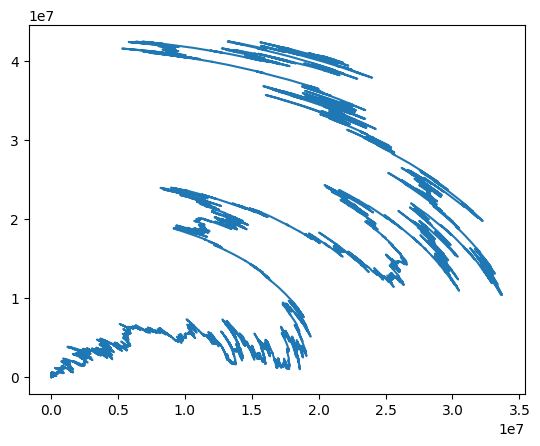

In [268]:
VV = np.array(VV);
plt.plot(np.abs(VV[:,0]), np.abs(VV[:,1]))

In [286]:
np.abs(VV[1])

array([0.99359364, 0.13123617])

In [282]:
V = np.array([1.,0.])
k=0
k1 = A(theta[2*k], dn[2*k], lam) @ V
k2 = A(theta[2*k+1], dn[2*k+1], lam) @ (V + dl/2*k1)
k3 = A(theta[2*k+1], dn[2*k+1], lam) @ (V + dl/2*k2)
k4 = A(theta[2*k+2], dn[2*k+2], lam) @ (V + dl*k3)
V = V + dl/6*(k1 + 2*k2 + 2*k3 + k4)

In [296]:
a = 2000.
NN = 100000
T = np.linspace(0., 10., NN)
dt = 10./NN
x = np.zeros(NN, dtype=np.complex_)
x[0] = 1.
for k in range(NN-1):
    k1 = 1j*a*x[k]
    k2 = 1j*a*(x[k] + dt/2*k1)
    k3 = 1j*a*(x[k] + dt/2*k2)
    k4 = 1j*a*(x[k] + dt*k3)
    x[k+1] = x[k] + dt/6*(k1 + 2*k2 + 2*k3 + k4)

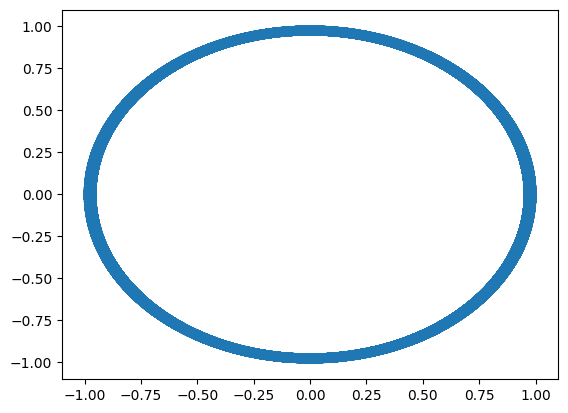

In [297]:
plt.plot(np.real(x), np.imag(x))

In [269]:
0.1*L/lam

6451.612903225807

In [292]:
0.3*dl/lam

0.1935483870967742

In [295]:
0.2/dt

2000.0